In [1]:
from random import randrange, randint, choice, choices, shuffle
import bisect, math, collections, operator, itertools, functools
from collections import namedtuple
from typing import Union, List, Container, Sequence
from functools import reduce, lru_cache
import sys,os
import string

from ads.utils import *
from IPython.display import IFrame

- [Intro to Recursion: Anatomy of a Recursive Solution](https://www.youtube.com/watch?v=yBWlPte6FhA&list=PLxQ8cCJ6LyOZHhAjIYrEFWcfYdyJl5VYf&index=3)
- [Complex Recursion Explained Simply](https://www.youtube.com/watch?v=wRH2I6IN4BE&list=PLxQ8cCJ6LyOZHhAjIYrEFWcfYdyJl5VYf&index=6)

- [n-Choose-k Problems | Statistics, Permutations, Combinations](https://www.youtube.com/watch?v=Hmld7MhFUDk)
- [How to Code Combinations Using Recursion](https://www.youtube.com/watch?v=NA2Oj9xqaZQ&t=1026s)

##### <b style=''>PDFs notes on Recursion</b>

In [1]:
pdf_path = "../PDFs/Recursion.pdf"
# IFrame(src=pdf_path, width="100%", height="600px")

## <b style='color:#FF4500'>Recursion from Simple Iteration</b>

#### Implement a function that compute positive exponent of a positive number (base).

In [4]:
def compute_exponent(base, exponent):
    if exponent == 0: return 1
    return base * compute_exponent(base, exponent-1)

In [5]:
def _test_compute_exponent():
    
    bases = [randint(0, 17) for i in range(10)]
    exponents =  [randint(0, 17) for i in range(10)]
    
    for base in bases:
        for exponent in exponents:
            expected = compute_exponent(base, exponent)
            actual   = base**exponent
            try: assert actual == expected
            except(AssertionError): print(base, exponent, expected, actual)

In [6]:
_test_compute_exponent()

#### Search a sorted array for first occurrence of k. [EPI: 11.1]

In [ ]:
def idx_k(L,k):
    
    if (len(L) == 0) or (L is None) or (k is None): return -0.0
    
    low,high,res = 0,len(L)-1,-0.0
    
    while low <= high:
        mid = (low + high) // 2
        if   L[mid] < k: low = mid+1
        elif L[mid] > k: high = mid-1
        else           : 
            res = mid
            break
    
    return res
        

In [ ]:
def idx_k_rec(L,k,low,high):
    
    if (len(L) == 0) or (L is None) or (k is None) or (low > high): return -0.0
    
    mid = (low + high) // 2
    
    if    L[mid] < k: return idx_k_rec(L, k, mid+1, high)
    elif  L[mid] > k: return idx_k_rec(L, k, low, mid-1)
    else: return mid

In [9]:
def _test_search_k(verbose=False):
    r = randrange(0,10)
    L = sorted([randrange(-8,9) for i in range(r)])
    k = choice([*range(-10,10)])
    
    if verbose: print(f'L: \t{L} \nk: \t{k} \nIs k in L: \t{k in L} \n\n')
        
    try:
        assert k == L[idx_k_rec(L,k,0,len(L)-1)]
        assert k == L[idx_k(L, k)]
        # assert k == L[idx_k_nearest(L, k)]
        # assert k == L[idx_k_nearest_rec(L, k)]
        
    except(TypeError):
        pass
        # print("It did not pass the test due to IndexError !!!")
        # print(f'L: \t{L} \nk: \t{k} \nIs k in L: \t{k in L} \n\n')
    
    except(AssertionError):
        print("It did not pass the test due to AssertionError !!!")
        print(f'L: \t{L} \nk: \t{k} \nIs k in L: \t{k in L}\n\n')
        

In [10]:
for _ in range(100): _test_search_k(False)

#### Check if an ascending-order array is sorted using recursion.

In [11]:
def is_sorted_itr(a):
    for i in range(len(a)-1, 0, -1):
        if a[i] < a[i-1]: return False
    return True

def is_sorted_rec(a, high):
    if high == 0: return True
    elif a[high-1] <= a[high]: return is_sorted_rec(a, high-1)
    return False

In [12]:
def _test_is_sorted_itr():
    a = sorted([randrange(-100,100) for _ in range(100)])
    
    try:
        assert is_sorted_itr(a)
        assert is_sorted_itr(a) == is_sorted_rec(a, len(a)-1)
    except:
        print(a)
## ===========================================================
_test_is_sorted_itr()

#### Compute the n-th Fibonacci Number.

The zeroth Fibonacci number is \(0\). The Fibonacci sequence typically starts with:

- $F(0) = 0$ (zeroth Fibonacci number)
- $F(1) = 1$ (first Fibonacci number)

From there, each subsequent number is the sum of the two preceding numbers:

- $F(n) = F(n-1) + F(n-2) \text{ for n } \ge 2$

In [83]:
def fibonacci(n):
    """ Return the nth Fibonacci number."""
    if n == 0: return 0
    elif n == 1: return 1
    else: return fibonacci(n - 1) + fibonacci(n - 2)

In [84]:
fibonacci(9)

34

In [85]:
def fib(n):
    """ Return all upto n fibonacci numbers."""
    p, q = 0, 1
    while (p <= n):
        yield p
        p, q = q, p + q

In [81]:
[*fib(89)], [*fib(90)]

([0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89],
 [0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89])

- INCORRECT implementation of Fibonacci generator!!!

```python
def fib_v2(n):
    p, q = 0, 1
    if n == 0: yield p
    if n == 1: yield q
    for i in range(2, n+1):
        p, q = q, p+q
        yield q

[*fib_v2(3)] # Output: [1, 2]
```

In [1]:
def fib_v2(n):
    """ Return all upto nth (a given number) Fibonacci numbers"""
    p, q = 0, 1
    for i in range(n+1):
        if   i == 0: yield p
        elif i == 1: yield q
        else:
            p, q = q, p+q
            yield q

In [2]:
[*fib_v2(9)]

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

In [74]:
@functools.lru_cache(None)
def fib_rec(n: int) -> int:
    """Computes the n-th Fibonacci number.

    Args:
        n: The number of which Fibonacci sequence to be computed.

    Returns:
        The n-th number of the Fibonacci sequence.
    """
    if n <= 1: return n
    else: return fib_rec(n-1) + fib_rec(n-2)

In [72]:
fib_rec(9)

34

#### Compute the n-th Factorial.

In [ ]:
def factorial(n):
    if n == 0: return 1
    else: return n * factorial(n - 1)

In [ ]:
factorial(8)

#### Implement a function that verify if a given string is a Palindrom.

In [ ]:
def is_palindrome_rec(s):
    # Base case: If the string has 0 or 1 characters, it is a palindrome
    if len(s) <= 1:
        return True

    # Recursive case: Check first and last characters, and call recursively
    if s[0] == s[-1]:
        # If the first and last characters match, call the function recursively with the substring
        return is_palindrome_rec(s[1:-1])
    else:
        # If the first and last characters don't match, it's not a palindrome
        return False

In [ ]:
def is_palindrome_rec_v2(s, idx=0):
    if idx == len(s)//2: return True
    return False if s[idx] != s[~idx] else is_palindrome_rec_v2(s, idx+1)
# ==========================================================================

is_palindrome_rec_v2("")

In [ ]:
L = [*range(10)]; L

for i in range(len(L)//2):
    print(i, ~i)

#### [1763. Longest Nice Substring](https://leetcode.com/problems/longest-nice-substring/description/) [E]

A string `s` is nice if, for every letter of the alphabet that `s` contains, it appears both in uppercase and lowercase. For example, "abABB" is nice because 'A' and 'a' appear, and 'B' and 'b' appear. However, "abA" is not because 'b' appears, but 'B' does not.

Given a string `s`, return the longest substring of `s` that is nice. If there are multiple nice strings, return the substring of the earliest occurrence. If there are none, return an empty string.

 

In [ ]:
# ChatGPT Solution
def longest_nice_substring(s: str) -> str:
    def is_nice(sub: str) -> bool:
        chars = set(sub)
        for char in chars:
            if char.lower() not in chars or char.upper() not in chars:
                return False
        return True

    def helper(s: str) -> str:
        if len(s) < 2: return ""
        if is_nice(s): return s

        for i in range(len(s)):
            if s[i].lower() not in s or s[i].upper() not in s:
                left = helper(s[:i])
                right = helper(s[i+1:])
                return left if len(left) >= len(right) else right
        
        return ""
    
    return helper(s)

In [ ]:
def _test_longest_nice_substring():
    test_cases = [
        # Basic cases
        ("YazaAay", "aAa"),  # Mixed case with multiple possible substrings
        ("Bb", "Bb"),        # Simple case where the entire string is nice
        ("c", ""),           # Single character cannot be nice

        # Cases with repeated characters
        ("aAaaAa", "aAaaAa"),  # All characters form a nice string
        ("abcABC", "abcABC"),  # Entire string is nice and has all characters both cases
        
        # Cases with non-continuous nice substrings
        ("aAAabb", "aAa"),    # "aAa" is the longest nice substring
        ("dDccCCbB", "ccCC"), # "ccCC" is the longest nice substring
        
        # Mixed cases with interleaved characters
        ("cCaAbBc", "cCaAbBc"),  # Entire string is nice
        
        # Edge cases
        ("", ""),  # Empty string
        ("aA", "aA"),  # Minimal nice substring
        ("abBA", "abBA"),  # All characters form a nice string

        # Longer mixed case
        ("xYzaAaXxyZz", "aAa"),
        
        # Case with no nice substrings
        ("abcdef", ""),  # No nice substrings since all characters are lowercase
        
        ("AbcDEfGhiJKLmnopQRsTUVWxyz", "")
    ]

    for s, expected in test_cases:
        returned = longest_nice_substring(s)
        try:
            assert returned == expected
        except:
            print(f"Input: {s}\n\tExpected: {expected}\n\treturned: {returned}")
#=========================================================================
_test_longest_nice_substring()

Input: aAAabb
	Expected: aAa
	returned: aAAa
Input: dDccCCbB
	Expected: ccCC
	returned: dDccCCbB
Input: xYzaAaXxyZz
	Expected: aAa
	returned: xYzaAaXxyZz


<div style="text-align:center" ><img src="../assets/leetcode/longest_nice_string.png" width="500" height="300" /></div>

#### Print a matrix recursively.

In [ ]:
def print_arr_rec(a, a_idx, a_len):
    if a_idx < a_len:
        print(a[a_idx])
        print_arr_rec(a, a_idx+1, a_len)
    else:
        return 0


def print_mat_rec(M, m_idx, m_len):
    if m_idx < m_len:
        a_idx, a_len = 0, len(M[m_idx])
        print_arr_rec(M[m_idx], a_idx, a_len)
        print_mat_rec(M, m_idx+1, m_len)


def _test_print_mat_rec():
    M = np.random.randint(0, 10, (4, 4))
    print(M)

    m_idx, m_len = 0, len(M)
    print_mat_rec(M, m_idx, m_len)

## <b style='color:#FF4500'>Searching</b>

##### Search a sorted array for <b style='color:magenta'>first</b> / <b style='color:magenta'>closest</b> occurrence of k. [EPI: 11.1]

##### Search a <b style='color:magenta'>sorted</b> array <b style='color:magenta'> in ascending order of repeatable</b> integer for   <b style='color:magenta'>any</b> / <b style='color:magenta'>first</b> entry equal to its index. [EPI: 11.2, CtCI: 9.3]

##### Find the position of the <b style='color:magenta'>SMALLEST</b> element in a CYCLICALLY SORTED array of DISTINCT elements. - [EPI: 11.3]

##### Search a sorted and rotated array of integer for a integer.

Given a sorted array of n integers that has been rotated an unknown number of times, write code to find an element in the array. You may assume that the array was originally sorted in increasing order. - [EPI: 11.3-Variant, CtCI: 11.3]

This code will run in $O(log_2{n})$ if all the elements are unique. However, with many duplicates, the algorithm is actually $O(n)$. This is because with many duplicates, we will often have to search both the left and right sides of the array (or subarrays).

- **CtCI**:

In [ ]:
def search_roated_sorted(a: list, k: int, low: int, high: int) -> None:
    if not a and low > high: return -1
    mid = (high + low) // 2
    
    if k == a[mid]: return mid
    else:
        if a[mid] < a[high] and a[mid] < k <= a[high]:
            return search_roated_sorted(a, k, mid+1, high)
        if a[mid] > a[high] and a[low] <= k < a[mid]:
            return search_roated_sorted(a, k, low, mid-1)
            
        else: # a[mid] == a[high] or a[mid] < k <= a[high] or a[low] <= k < a[mid]
            res = search_roated_sorted(a, k, low, mid-1)
            if res == -1: return search_roated_sorted(a, mid+1, high)
            return res

##### Given a sorted array of strings which is interspersed with empty strings, write a method to find the location of a given string. [CtCI: 11.5]

## <b style='color:#FF4500'>Recursions and Backtracking</b>

##### Implement a program that prints all the n-bits binary numbers.

**Examples**:
1. print_binary(1) ==> 0, 1
1. print_binary(2) ==> 00, 01, 10, 11
1. print_binary(3) ==> 000, 001, 010, 011, 100, 101, 110, 111

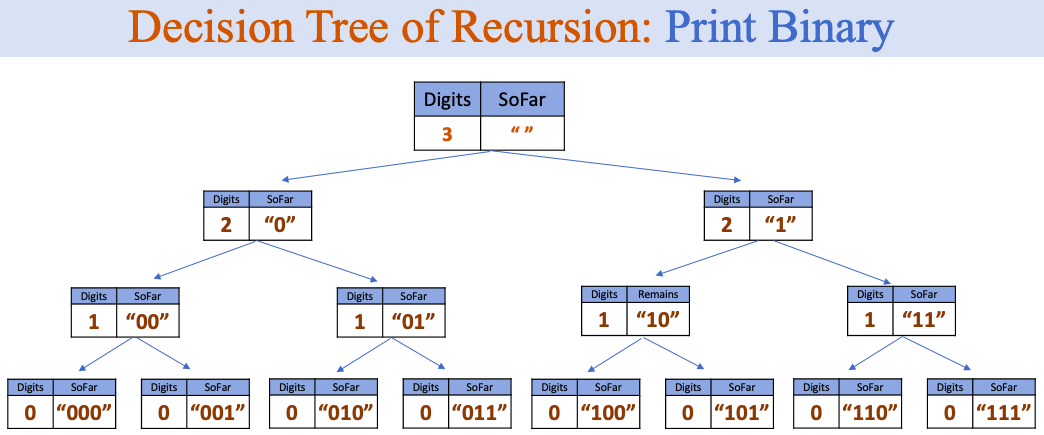

In [ ]:
def print_binary(bits: int, prefix: str = "") -> None:
    if bits == 0:
        print(prefix)
    else:
        print_binary(bits-1, prefix + '0')
        print_binary(bits-1, prefix + '1')

In [ ]:
def _test_print_binary():
    num_of_bits = 3  # randint(4, 16)
    print_binary(num_of_bits)

#============================================
_test_print_binary()

##### Implement a program that prints all the n-digits decimal numbers.

In [ ]:
def print_decimal(digits: int) -> None:
    prefix = ''
    _print_decimal(digits, prefix)

In [ ]:
def _print_decimal(digits: int, prefix: str) -> None:
    if digits == 0:
        print(prefix)
    else:
        for i in range(10):
            _print_decimal(digits-1, prefix + str(i))

In [ ]:
def _test_print_decimal() -> None:
    num_of_digits = 4  # randint(4, 16)
    print_decimal(num_of_digits)
#======================================================
# _test_print_decimal()

##### Combinations of dices roll.

Write a recursive function `dice_roll(num)` that accepts an integer, the number of six sided dice to roll, and output all possible combinations of values that could appear on the dice.

In [ ]:
def dice_roll(n: int) -> Container[str]:
    combinations = []
    _dice_roll(n, combinations)
    for comb in combinations:
        print(comb)
    return combinations

In [ ]:
def _dice_roll(n: int, L: Container[str], chosen=[]) -> None:
    if n == 0:
        L.append(', '.join([str(i) for i in chosen]))
    else:
        for side in range(1, 7):
            _dice_roll(n - 1, L, chosen + [side])

In [ ]:
def _test_dice_roll():
    n = randrange(0, 5)
    dice_roll(n)
    print('Number of Dice: ', n)

In [ ]:
# _test_dice_roll()

##### Sum to a `target` of  `n` dice with `k` face. - [leetcode: 1155](https://leetcode.com/problems/number-of-dice-rolls-with-target-sum/).

You have n dice and each die has k faces numbered from 1 to k.

Given three integers `n`, `k`, and `target`, return the number of possible ways (out of the $k^n$ total ways) to roll the dice so that the sum of all the face-up numbers equals to the `target`. Since the answer may be too large, return it modulo $10^9 + 7$.



- Example 1:
    - Input: n = 1, k = 6, target = 3
    - Output: 1
    - Explanation: You throw one die with 6 faces. There is only one way to get
    a sum of 3.

- Example 2:
    - Input: n = 2, k = 6, target = 7
    - Output: 6
    - Explanation: You throw two dice, each with 6 faces. There are 6 ways to
    get a sum of 7: 1+6, 2+5, 3+4, 4+3, 5+2, 6+1.

- Example 3:
    - Input: n = 30, k = 30, target = 500
    - Output: 222616187
    - Explanation: The answer must be returned modulo 109 + 7.


- Constraints:
    - 1 <= n, k <= 30
    - 1 <= target <= 1000


In [ ]:
def sum_dice_roll(dice: int, target: int, face=6) -> list:
    res = []
    _sum_dice_roll(dice, target, face, res, 0)
    for i in res:
        print(i)
    return res

def _sum_dice_roll(N: int, t: int, face: int, L: list, _sum: int, chosen=[]):
    if N == 0:
        if _sum == t:
            L.append(tuple(chosen))
    else:
        for i in range(1, face+1):
            # (x < y < z) -> (y > x and y < z)
            if _sum + i + 1*(N-1) <= t <= _sum + i + 6*(N-1):
                chosen.append(i)
                _sum_dice_roll(N-1, t, face, L, _sum+i, chosen)
                chosen.pop()

In [ ]:
def sum_dice_roll_alt(dice: int, target: int) -> list:
    combinations = []
    _sum_dice_roll_alt(dice, target, combinations)
    # for comb in combinations: print(comb)
    return combinations

def _sum_dice_roll_alt(N: int, t: int, L: list, _sum=0, chosen=[]) -> None:
    if N == 0:
        if t == _sum:
            L.append(tuple(chosen))
    else:
        for i in range(1, 7):
            if _sum + i + 1 * (N - 1) <= t and t <= _sum + i + 6 * (N - 1):
                _sum_dice_roll_alt(N - 1, t, L, _sum+i, chosen + [i])

In [ ]:
def sum_dice_roll2(dice: int, target: int) -> Container[str]:
    combinations = []
    _sum_dice_roll2(dice, target, combinations)
    for comb in combinations:
        print(comb)
    return combinations

def _sum_dice_roll2(n: int, t: int, L: Container[str], chosen=[]) -> None:
    if n == 0:
        if t == 0:
            L.append(tuple(chosen))
    else:
        for i in range(1, 7):
            if t-i >= 1 * (n - 1) and t-i <= 6 * (n-1):
                chosen.append(i)
                _sum_dice_roll2(n-1, t-i, L, chosen)
                chosen.pop()

In [ ]:
def _test_sum_dice_roll():
    dice = randrange(1, 5)
    target = randrange(1, 1+dice*6)

    res1 = sum_dice_roll(dice, target)
    res2 = sum_dice_roll_alt(dice, target)
    res3 = sum_dice_roll2(dice, target)
    assert res1 == res2 == res3
    print('Number of Dice: ', dice, 'Target: ', target)
#===============================================================
# _test_sum_dice_roll()

##### Implementation of the phone number mnemonics. - [EPI: 6.7] | [leetcode: 17](https://leetcode.com/problems/letter-combinations-of-a-phone-number/).

Given a string containing digits from 2-9 inclusive, return all possible letter combinations that the number could represent. Return the answer in any order.

A mapping of digit to letters (just like on the telephone buttons) is given below. Note that 1 does not map to any letters.

- Example 1:
    - Input: digits = "23"
    - Output: ["ad","ae","af","bd","be","bf","cd","ce","cf"]
- Example 2:
    - Input: digits = ""
    - Output: []
- Example 3:
    - Input: digits = "2"
    - Output: ["a","b","c"]
 
- Constraints:
    0 <= digits.length <= 4
    digits[i] is a digit in the range ['2', '9'].

In [106]:
def phone_mnemonic(phn_num: str) -> Container[Sequence]:

    MAPPING = ('0', '1', 'ABC', 'DEF', 'GHI', 'JKL', 'MNO', 'PQRS', 'TUV', 'WXYZ')
    result = []
    _phone_mnemonics(phn_num, 0, MAPPING, result)
    return result

def _phone_mnemonics(phn_num: str, k: int, MAPPING: tuple, result, prefix=""):
    if k == len(phn_num):
        result.append(prefix)
    else:
        for i in MAPPING[string.digits.index(phn_num[k])]:
        #for i in MAPPING[int(phn_num[k])]:
            _phone_mnemonics(phn_num, k+1, MAPPING, result, prefix+i)

In [128]:
def _test_phone_mnemonic():
    mnemonics = phone_mnemonic("7186797621")
    for i in mnemonics: print(i)
    # assert len(mnemonics) == (3**6)*(4**2)
    # print(len(mnemonics))

In [130]:
# _test_phone_mnemonic()

- **Time Complexity**
    - Each recursive call performs constant work outside the recursion (appending to the result list or iterating over a small set of characters).
    - Since the recursion depth is `n` (the length of `phn_num`), and each level of the recursion branches out into at most 4 calls, the total time complexity is $ O(4^n) $.

- **Space Complexity**
    - The space complexity is determined by the recursion depth and the storage required for results.
    - The recursion depth is `n`, so the stack space required is $ O(n) $.
    - The result list stores $ 4^n $ mnemonics in the worst case, and each mnemonic has a length of `n`.
    - Therefore, the space complexity is $ O(n \cdot 4^n) $.

- **Summary**
    - **Time Complexity**: $ O(4^n) $
    - **Space Complexity**: $ O(n \cdot 4^n) $

This analysis shows that the algorithm has exponential time complexity due to the combinatorial nature of the problem, which involves generating all possible combinations of characters for the given phone number.

##### Compute all valid IP addresses. - [EPI: 6.10] | [NeetCode](https://www.youtube.com/watch?v=61tN4YEdiTM) | [leetcode: 93](https://leetcode.com/problems/restore-ip-addresses/)

A decimal string is a  string consisting of digits between 0 and 9. Internet Protocol (IP) addresses can be written as four decimal strings separated by periods, e.g., 192.168.1.201. A careless programmer mangles a string representing an IP address in such a way that all the periods vanish.

Write a program that determines where to add periods to a decimal string so that the resulting string is a valid IP address. There may be more than one valid IP address corresponding to a string, in which case you should print all possibilities.

###### Iterative:

In [135]:
def get_valid_ip_address(s: str) -> Container:
    
    def is_valid_part(s: str) -> bool: return len(s) == 1 or (s[0] != '0' and int(s) <= 255)

    result, parts = [], [None] * 4
    
    for i in range(1, min(4, len(s))):
        parts[0] = s[:i]
        
        if is_valid_part(parts[0]):
            for j in range(1, min(4, len(s)-i)):
                parts[1] = s[i : i+j]
                
                if is_valid_part(parts[1]):
                    for k in range(1, min(4, len(s)-i-j)):
                        parts[2], parts[3] = s[i+j : i+j+k], s[i+j+k :]
                        
                        if is_valid_part(parts[2]) and is_valid_part(parts[3]):
                            result.append('.'.join(parts))
    return result

**Time Complexity**: The total number of IP address is a constant $2^{32}$, implying an $O(1)$ time complexity.

###### Recursive

- NeetCode Solution (Backtracking)

In [131]:
def form_ip_addresses(s: str):
    
    def _form_id_addresses(i, dots, partial_ip):
        if dots == 4 and i == len(s): res.append(partial_ip[:-1])
        if dots > 4: return None
        
        for j in range(i, min(i+3, len(s))):
            if int(s[i:j+1]) <= 255 and (i == j or s[i] != '0'):
                _form_id_addresses(j+1, dots+1, partial_ip + s[i:j+1] + '.')
    
    if len(s) > 12: return None
    res = []
    return _form_id_addresses(0, 0, "")

In [132]:
def restore_ip_addresses(s):
    
    def backtrack(s, segments, curr_address):
        
        # Base case: If all segments are found and the string is exhausted, add the address to the result
        if segments == 4 and not s:
            result.append(curr_address[:-1])  # Remove the trailing period
        
        # Base case: If all segments are found but the string is not exhausted, backtrack
        elif segments == 4 or not s:
            return

        # Try different segment lengths (1, 2, 3) and backtrack recursively
        for i in range(1, 4):
            if i <= len(s):
                segment = s[:i]
                # Ignore segments starting with 0, except for single-digit segments
                if (segment[0] == '0' and len(segment) > 1) or int(segment) > 255: continue
                backtrack(s[i:], segments + 1, curr_address + segment + '.')

    result = []
    backtrack(s, 0, '')
    return result

- **ChatGPT**:

In [133]:
def restore_ip_addresses_v2(s):
    def is_valid_part(part):
        return 0 <= int(part) <= 255 and (len(part) == 1 or part[0] != '0')

    def backtrack(start, path):
        if start == len(s) and len(path) == 4:
            valid_ips.append(".".join(path))
            return
        
        if len(path) >= 4:
            return
        
        for end in range(start + 1, min(start + 4, len(s) + 1)):
            part = s[start:end]
            if is_valid_part(part):
                path.append(part)
                backtrack(end, path)
                path.pop()

    valid_ips = []
    backtrack(0, [])
    
    return valid_ips

In [139]:
def _test_form_ip_addresses():
    s = "19216811201"
    returned1 = restore_ip_addresses(s)
    returned2 = get_valid_ip_address(s)
    returned3 = restore_ip_addresses_v2(s)
    assert len(returned1) == len(returned2)
    
    for ip_address1, ip_address2, ip_address3 in zip(returned1, returned2, returned3):
        print(ip_address1, ip_address2, ip_address3)
        assert ip_address1 == ip_address2 == ip_address3

_test_form_ip_addresses()

192.168.11.201 192.168.11.201 192.168.11.201


In [15]:
# Test the function with an example input
decimal_string = "25525511135"
valid_ips = restore_ip_addresses(decimal_string)
for ip in valid_ips:
    print(ip)

255.255.11.135
255.255.111.35


#### Permutations

- [Permutations : Introduction to backtracking](https://www.youtube.com/watch?v=Nabbpl7y4Lo)

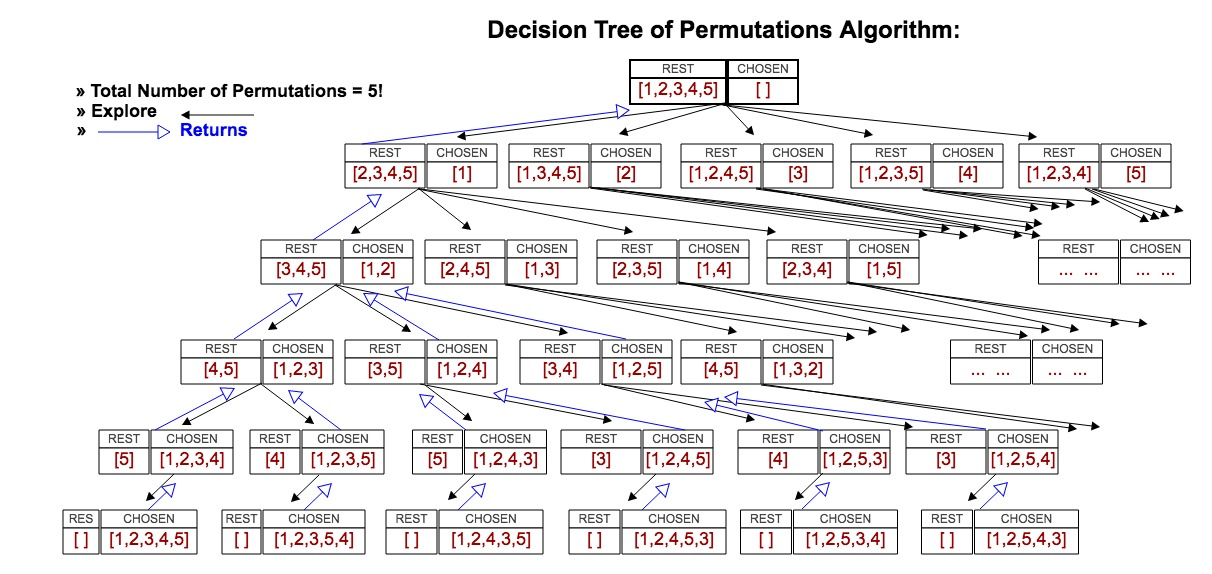

In [ ]:
def permutation_list_A(L: List[int]) -> Container[Sequence]:
    result = []
    _permutation_list_A(L, result)
    return result


def _permutation_list_A(L: List[int], result: Container, chosen=[]) -> None:

    if len(L) == 0: result.append(','.join([str(i) for i in chosen]))
    else:
        for i in range(len(L)):
            first = L.pop(i)
            chosen.append(first)
            _permutation_list_A(L, result, chosen)

            L.insert(i, first)
            chosen.pop()

##### Write a method to compute all permutations of a string. [CtCI: 9.5].

In [ ]:
def permute_str_A(s: str) -> Container[Sequence]:
    '''
    Args:
        s: The string to be permuted.
    '''
    result = []
    _permute_str_A('', s, result)
    return result


def _permute_str_A(prefix: str, sufix: str, result: List) -> None:
    if sufix == '': result.append(prefix)
    else:
        for i in range(len(sufix)):
            _permute_str_A(prefix+sufix[i], sufix[:i]+sufix[i+1:], result)

In [ ]:
def permute_str_B(s: str) -> Container[Sequence]:
    result = []
    _permute_str_B(list(s), result)
    return result


def _permute_str_B(L: list, result: list, offset=0) -> None:
    if offset == len(L): result.append(''.join([str(i) for i in L]))
    else:
        for i in range(offset, len(L)):
            swap(L, offset, i)
            _permute_str_B(L, result, offset+1)
            swap(L, offset, i)

In [ ]:
def permute_str_C(s: str) -> Container[Sequence]:
    result = []
    L = list(s)
    offset = len(L)-1
    _permute_str_C(L, result, offset)
    return result


def _permute_str_C(L: list, result: list, offset) -> None:
    if offset == 0:
        result.append(''.join([str(i) for i in L]))
    else:
        for i in range(0, offset+1):
            swap(L, offset, i)
            _permute_str_C(L, result, offset-1)
            swap(L, offset, i)

In [ ]:
def _test_permutation_str():
    s = 'BERKELEY'
    res1 = permute_str_A(s)
    res2 = permute_str_B(s)
    res3 = permute_str_C(s)

    assert len(res1) == len(res2) == len(res3)
    # for i, j, k in zip(res1, res2, reversed(res3)): print(i, j, k, sep='\t')
    print(len(res1))

#### Power Set

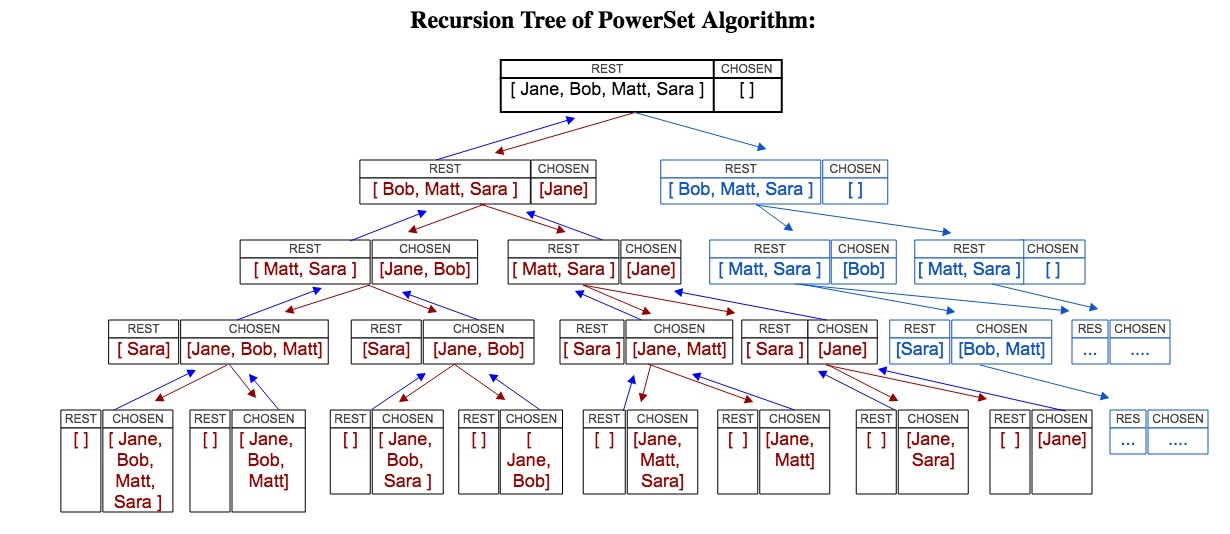

##### Write a function that takes as input a set and returns its power set. Alternatively, Given a collection of integers that might contain duplicates, nums, return all possible subsets (the power set). - [EPI: 15.4].

In [ ]:
def power_set(L):
    ''' Computes the power set of the given set, L'''
    result = []
    _power_set(L, result)
    return result


def _power_set(chose_from, result, chosen=[]):
    '''
    Args:
        chosen     : list of chosen elements.
        chose_from : list of elements to chose from.
        result     : list of power set elements.
    '''
    if len(chose_from) == 0:
        result.append(list(chosen))
    else:
        first = chose_from.pop(0)
        chosen.append(first)
        _power_set(chose_from, result, chosen)

        chosen.pop()
        _power_set(chose_from, result, chosen)

        chose_from.insert(0, first)

In [ ]:
# print all subsets of the characters in s
def power_set_str1(s: str) -> None:
    '''
        Note: it doesn't take empty set into accout. 
    '''
    res = []
    _power_set_str1("", s, res)
    return res


# print all subsets of the remaining elements, with given prefix
def _power_set_str1(prefix: str, s: str, result) -> None:
    if len(s) > 0:
        # print(prefix+s[0])
        # result.append(prefix+s[0])
        result.append(list(prefix+s[0]))
        _power_set_str1(prefix+s[0], s[1:], result)
        _power_set_str1(prefix, s[1:], result)

In [ ]:
def power_set_str2(s: str) -> None:
    res = []
    _power_set_str2("", s, res)
    return res


def _power_set_str2(prefix: str, s: str, result) -> None:
    # print(prefix)
    result.append(list(prefix))
    for i in range(len(s)):
        _power_set_str2(prefix + s[i], s[i+1:], result)

In [ ]:
def _test_power_set():
    s = "1234"
    L: list[str] = list(s)
    ps = power_set(L)
    ps1 = power_set_str1(s) # it doesn't take empty set into accout.
    ps2 = power_set_str2(s)

    assert len(ps) == len(ps2) == pow(2, len(L))
    assert len(ps1) == len(ps)-1 == pow(2, len(L))-1
    
    for i in ps: print(i)

##### Write a program which computes all size k subsets of {1, 2, ..., n} where `k` and `n` are program inputs. - [EPI: 15.5].

In [ ]:
# print all subsets that take k of the remaining elements, with given prefix
def comb_str1(s: str, k: int) -> None:
    _comb_str1(s, "", k)


def _comb_str1(s: str, prefix: str, k: int) -> None:
    if k > len(s):
        return None
    elif k == 0:
        print(prefix)
    else:
        ## Case 1: We Chose
        # If we chose first item of 's' (s[0]), then there are 'k-1` 
        # items need to be choosen from 'n-1' (s[1:])
        _comb_str1(s[1:], prefix+s[0], k-1)
        
        ## Case 2: We don't Chose
        # If we don't chose first item of 's' (s[0]), then there are still 'k`
        # items need to be choosen from 'n-1' (s[1:])
        _comb_str1(s[1:], prefix, k)

In [ ]:
# print all subsets that take k of the remaining elements, with given prefix
def comb_str2(s: str, k: int) -> None:
    _comb_str1(s, "", k)


def _comb_str2(s: str, prefix: str, k: int) -> None:
    if k == 0:
        print(prefix)
    else:
        for i in range(len(s)):
            _comb_str2(s[i+1:], prefix+s[i], k-1)

In [ ]:
def _test_comb_str():
    s = "TEA"
    k = 2
    comb3 = comb_str1(s, k)
    comb4 = comb_str2(s, k)

In [ ]:
def n_choose_k(n: int, k: int):
    result = []
    _n_choose_k(n, k, 1, result)
    return result


def _n_choose_k(n: int, k: int, offset: int, result, chosen=[]):
    if len(chosen) == k:
        result.append(list(chosen))

    # Generate remaining combinations over {offset, ..., n - 1} of size
    remaining_to_choose = k - len(chosen)
    i = offset
    while i <= n and remaining_to_choose <= n - i + 1:
        chosen.append(i)
        _n_choose_k(n, k, i + 1, result, chosen)
        chosen.pop()
        i += 1

In [ ]:
def comb_B(L, k):
    result = []
    _comb_B(L, k, 0, result)
    return result

def _comb_B(L, k, start, result, chosen=[]):
    if (k == len(chosen)): result.append(tuple(chosen))
    else:
        i = start
        reamining_to_chose = k - len(chosen)
        while i <= len(L) and reamining_to_chose <= len(L) - i:
            chosen.append(L[i])
            _comb_B(L, k, i + 1, result, chosen)
            chosen.pop()
            i += 1

In [ ]:
def _comb_B2(L, k, start, result, chosen=[]):
    if (k == len(chosen)):
        result.append(chosen[:])
    else:
        for i in range(start, len(L)+1):
            if k - len(chosen) <= len(L) - i:  # k - len(chosen) -> reamining_to_chose
                chosen.append(L[i])
                _comb_B2(L, k, i + 1, result, chosen)
                chosen.pop()

In [ ]:
def _test_comb_list():
    L = list("12345")
    people = ["Jane", "Bob", "Matt", "Sara", "Shah"]

    n = len(L)
    k = randint(0, n)

    n_chose_k = factorial(n)/(factorial(n-k)*factorial(k))
    print("n: ", n, "k: ", k)

    res1 = comb_B(L, k)
    print_matrix(res1)

    # n = randrange(1, 10)
    # k = randint(1, n)

    # print('N: ', n, 'K: ', k)
    choose_k_from_n = n_choose_k(n, k)
    print_matrix(choose_k_from_n)

#### Combination Sum II

Given a collection of candidate numbers `candidates` and a target number `target`, find all unique combinations in candidates where the candidate numbers sum to target. 

- `Note`: 
    1. Each number in candidates may only be used once in the combination.
    2. The solution set must not contain duplicate combinations.

- Example 1:
    - Input: candidates = [10,1,2,7,6,1,5], target = 8
    - Output: [[1,1,6],[1,2,5],[1,7],[2,6]]

- Example 2:
    - Input: candidates = [2,5,2,1,2], target = 5
    - Output: [[1,2,2],[5]]
 
- Constraints:
    1. <= candidates.length <= 100
    1. <= candidates[i] <= 50
    1. <= target <= 30

###### [Approach 1: Backtracking with Counters](https://leetcode.com/problems/combination-sum-ii/solution/)

Here are a few steps on how we can implement the above intuition:

First of all, we build a counter table out of the given list of numbers.

We would then use this counter table during our backtracking process, which we define as the function `backtrack(comb, remain, curr, candidate_groups, results)`. In order to keep the state of each backtracking step, we use quite a few parameters in the function, which we elaborate as follows:

- `comb`: the combination we built so far at each step.
- `remain`: the remaining sum that we need to fill, in order to reach the target sum.
- `curr`: the cursor that points to the current group of number that we are using from the counter table.
- `counter`: the current counter table.
- `results`: the final combinations that have the target sum.
At each invocation of the backtracking function, we first check if we reach the target sum (i.e. sum(comb) = target), and if we should stop the exploration simply because the sum of current combination goes beyond the desired target.

If there is still some remaining sum to fill, we will then iterate through the current counter table to pick the next candidate.

Once we pick a candidate, we then continue the exploration by invocating the backtrack() function with the updated states.
More importantly, at the end of each exploration, we need to revert the state we updated before, in order to start off a clean slate for the next exploration. It is due to this backtracking operation, the algorithm got its name.

<font color='toamto'>Complexity Analysis</font>
- Let N be the size of the input array.
- Time Complexity: $\mathcal{O}(2^N)$
    - In the worst case, our algorithm will exhaust all possible combinations from the input array. Again, in the worst case, let us assume that each number is unique. The number of combination for an array of size N would be $2^N2N$, i.e. each number is either included or excluded in a combination. Additionally, it takes $\mathcal{O}(N)$ time to build a counter table out of the input array. Therefore, the overall time complexity of the algorithm is dominated by the backtracking process, which is $\mathcal{O}(2^N)$

- Space Complexity: $\mathcal{O}(N)$
    - We first build a counter table, which in the worst case will consume $\mathcal{O}(N)$ space. We use the variable comb to keep track of the current combination we build, which requires again $\mathcal{O}(N)$ space. In addition, we apply recursion in the algorithm, which will incur additional memory consumption in the function call stack. In the worst case, the stack will pile up to $\mathcal{O}(N)$ space. To sum up, the overall space complexity of the algorithm is $\mathcal{O}(N) + \mathcal{O}(N) + \mathcal{O}(N) = \mathcal{O}(N)$

`Note`: We did not take into account the space needed to hold the final results of combination in the above analysis.



In [ ]:
def combinationSum2(candidates: list[int], target: int) -> list[list[int]]:

    def backtrack(comb: list, remain: int, cursor: int, counter: list[tuple], results):
        if remain == 0:
            # make a deep copy of the current combination rather than keeping the reference.
            results.append(list(comb))
            return
        elif remain < 0: return

        for next_cursor in range(cursor, len(counter)):
            candidate, freq = counter[next_cursor]

            if freq <= 0: continue

            # add a new element to the current combination
            comb.append(candidate)
            counter[next_cursor] = (candidate, freq-1)

            # continue the exploration with the updated combination
            backtrack(comb, remain - candidate, next_cursor, counter, results)

            # backtrack the changes, so that we can try another candidate
            counter[next_cursor] = (candidate, freq)
            comb.pop()

    results = []  # container to hold the final combinations
    counter = Counter(candidates)
    # convert the counter table to a list of (num, count) tuples
    counter = [(c, counter[c]) for c in counter]

    backtrack(comb = [], remain = target, cursor = 0, counter = counter, results = results)

    return results

###### [Approach 2: Backtracking with Index](https://leetcode.com/problems/combination-sum-ii/solution/)

We optimize the backtracking a bit by adopting the measure of early stopping, i.e. once the sum of current combination exceeds the target, we can stop the exploration for the rest of the numbers. Because all the numbers are positve, as specified in the problem, the sum of combination will increase monotonically. It is needless to explore more combinations whose sum goes beyond the desired target.


- **Time Complexity**: $\mathcal{O}(2^N)$
    - N be the size of the input array.
    - In the worst case, our algorithm will exhaust all possible combinations from the input array, which in total amounts to $2^N$.

- **Space Complexity**: $\mathcal{O}(N)$

    - We use the variable `comb` to keep track of the current combination we build, which requires $\mathcal{O}(N)$ space.

    - We apply recursion in the algorithm, which will incur additional memory consumption in the function call stack; in the worst case, which piles up to $\mathcal{O}(N)$ space.

    - The overall space complexity is $\mathcal{O}(N) + \mathcal{O}(N) = \mathcal{O}(N)$.

`Note`: we did not take into account the space needed to hold the final results of combination in the above analysis.

In [ ]:
def combinationSum2(candidates: List[int], target: int) -> List[List[int]]:

    def backtrack(comb: list, remain: int, cursor: int, results: list):

        if remain == 0:
            # make a deep copy of the resulted combination
            results.append(list(comb))
            return

        for next_cursor in range(cursor, len(candidates)):

            if next_cursor > cursor and candidates[next_cursor] == candidates[next_cursor-1]:
                continue

            pick = candidates[next_cursor]
            # optimization: skip the rest of elements starting from 'curr' index
            if remain - pick < 0: break

            comb.append(pick)
            backtrack(comb, remain-pick, next_cursor + 1, results)
            comb.pop()

    candidates.sort()
    comb, results = [], []
    backtrack(comb, target, 0, results)

    return results

#### Generate Parenthesis

##### Implement an algorithm to print all valid (i.e. properly opened and closed) combinations of n-pairs of parentheses. - [CtCI: 9.6].

In [ ]:
def gen_parens(k: int) -> Container[str]:

    def _gen_parens(l, r, c, parens, result) -> None:

        # print(f"""{'_gen_parens('}{l}{', '}{r}{', '}{c}{', '}{parens}{')'}""")
        # print(f"""{'    '*c}{'_gen_parens('}{l}{', '}{r}{', '}{c}{', '}{parens}{')'}""")

        if l < 0 or r < l: return None
        if l == 0 and r == 0: result.append(''.join(parens))
        else:
            if l > 0:
                parens[c] = '('
                _gen_parens(l-1, r, c+1, parens, result)
            if r > l:
                parens[c] = ')'
                _gen_parens(l, r-1, c+1, parens, result)

    result = []
    parens = [None]*(2*k)
    _gen_parens(k, k, 0, parens, result)
    return result

In [ ]:
def gbp1(num_pairs: int) -> Container[str]:
    def _gbp1(l: int, r: int, valid_prefix: str, result=[]) -> Container[str]:

        # print(f"""{'_gbp1('}{l}{', '}{r}{', '}{valid_prefix}{')'}""")
        # l -> num_left_parens_needed
        # r -> num_right_parens_needed

        if l > 0:
            _gbp1(l - 1, r, valid_prefix + '(')  # able to insert '('.
        if l < r:
            _gbp1(l, r - 1, valid_prefix + ')')  # able to insert ')'.

        if not r:
            result.append(valid_prefix)
        return result

    return _gbp1(num_pairs, num_pairs, '')

#### [LeetCode: 22. Generate Parentheses](https://leetcode.com/problems/generate-parentheses/description/)


Given n pairs of parentheses, write a function to generate all combinations of well-formed parentheses.

For example, given n = 3, a solution set is:

[
    "((()))",
    "(()())",
    "(())()",
    "()(())",
    "()()()"
]
"""




Approach 1: Brute Force


Intuition:
We can generate all $2^{2n}$$ sequences of '(' and ')' characters. Then, we will
check if each one is valid.

Algorithm:
To generate all sequences, we use a recursion. All sequences of length n is
just '(' plus all sequences of length n-1, and then ')' plus all sequences of
length n-1.

To check whether a sequence is valid, we keep track of balance, the net
number of opening brackets minus closing brackets. If it falls below zero at
any time, or doesn't end in zero, the sequence is invalid - otherwise it is valid.

Complexity Analysis

Time Complexity : $O(2^{2n}n)$. For each of $2^{2n}$ sequences, we need to create
and validate the sequence, which takes $O(n)$ work.

Space Complexity : $O(2^{2n}n)$. Naively, every sequence could be valid.
See Approach 3 for development of a tighter asymptotic bound.

In [ ]:
class GenParenthesis(object):
    def generateParenthesis(self, n):
        def generate(A=[]):
            if len(A) == 2*n:
                if valid(A): ans.append("".join(A))
            else:
                A.append('(')
                generate(A)
                A.pop()
                A.append(')')
                generate(A)
                A.pop()

        def valid(A):
            bal = 0
            for c in A:
                if c == '(': bal += 1
                else: bal -= 1
                if bal < 0: return False
            return bal == 0

        ans = []
        generate()
        return ans

**Approach 2**: Backtracking
Intuition and Algorithm

Instead of adding '(' or ')' every time as in Approach 1, let's only add them
when we know it will remain a valid sequence. We can do this by keeping track
of the number of opening and closing brackets we have placed so far.

We can start an opening bracket if we still have one (of n) left to place.
And we can start a closing bracket if it would not exceed the number of opening
brackets.

In [ ]:
def generateParenthesis( N):
    ans = []

    def backtrack(S='', left=0, right=0):
        if len(S) == 2 * N:
            ans.append(S)
            return
        if left < N:
            backtrack(S+'(', left+1, right)
        if right < left:
            backtrack(S+')', left, right+1)

    backtrack()
    return ans


**Approach 3**: Closure Number

Intuition:

To enumerate something, generally we would like to express it as a sum of
disjoint subsets that are easier to count.

Consider the closure number of a valid parentheses sequence S: the least
index >= 0 so that S[0], S[1], ..., S[2*index+1] is valid. Clearly, every
parentheses sequence has a unique closure number. We can try to enumerate
them individually.

Algorithm:

For each closure number c, we know the starting and ending brackets must be
at index 0 and 2*c + 1. Then, the 2*c elements between must be a valid
sequence, plus the rest of the elements must be a valid sequence.


Complexity Analysis:

Time and Space Complexity : O(4^n/sqrt(n)). The analysis is similar to Approach 2.

In [ ]:
def generateParenthesis2(self, N):
    if N == 0:
        return ['']
    ans = []
    for c in range(N):
        for left in self.generateParenthesis2(c):
            for right in self.generateParenthesis2(N-1-c):
                ans.append('({}){}'.format(left, right))
    return ans

### <b style='color:#C71585'>EPI

#### Implement the Euclidean algorithm for calculating the greatest common divisor of two numbers. - [EPI-15:boot camp].

#### Towers of Hanoi - [EPI: 15.1].

Write a program which prints a sequence of operations that transfer n rings from one peg to another. You have a third peg, which is initially empty. The only operation you can perform is taking a single ring from the top of the peg and placing it on the top of another peg. You must never place a larger ring above a smaller ring.

#### Generate all nonattacking placements of n-Queens. - [EPI-15: 02]

Write an algorithm to print all ways of arranging eight queens on an 8x8 chess board so that none of them share the same row, column or diagonal. In this case, "diagonal" means all diagonals, not just the two that bisect the board. - [CtCI: 9.9].

In [ ]:
def n_queens(n):
    results = []
    _n_queens(0, n, results)
    return results


def _n_queens(row, col, results, columns=[]):
    if row == col:
        results.append(tuple(columns))
        return None
    for c in range(col):
        columns.append(c)
        if is_valid(columns):
            _n_queens(row+1, col, results, columns)
        columns.pop()


def is_valid(L):
    row_id = len(L)-1
    for i in range(row_id):
        col_diff = abs(L[row_id] - L[i])
        row_diff = row_id - i
        horizontal_attack = col_diff == 0
        diagonal_attack = col_diff == row_diff
        if horizontal_attack or diagonal_attack: return False

    return True


def solve_n_queens(n):
    result = []
    _solve_n_queens(0, n, result, [0] * n)
    return result


def _solve_n_queens(row, n, result, columns):
    if row == n:
        # All queens are legally placed.
        result.append(tuple(columns))
        return None
    for col in range(n):
        # Test if a newly placed queen will conflict any earlier queens
        # placed before.
        L = [abs(c - col) not in (0, row - i) for i, c in enumerate(columns[:row])]
        if all(L):
            columns[row] = col
            _solve_n_queens(row+1, n, result, columns)


def _print_board(L):
    board = []
    for i in L:
        row = ['_*_']*len(L)
        row[i] = '_Q_'
        board.append(row)
    for i in board:
        print(i)
    print()


def _test_n_queens():
    random_int = randrange(3, 11)
    res1 = n_queens(random_int)
    res2 = solve_n_queens(random_int)
    assert res1 == res2
    for board in res1: _print_board(board)
    print('Number of Queens:', random_int, 'Number of ways:', len(res1))

#### Generate string of matched parentheses. - [EPI-15: 06]

Given n pairs of parentheses, write a function to generate all combinations of well-formed parentheses.For example, given `n = 3`, a solution set is: `["((()))", "(()())", "(())()", "()(())", "()()()"]`


###### Approach 1: Brute Force



- **Intuition**: We can generate all $2^{2n}$ sequences of '(' and ')' characters. Then, we will
check if each one is valid.

- **Algorithm**: To generate all sequences, we use a recursion. All sequences of length n is
just '(' plus all sequences of length n-1, and then ')' plus all sequences of
length n-1.

To check whether a sequence is valid, we keep track of balance, the net
number of opening brackets minus closing brackets. If it falls below zero at
any time, or doesn't end in zero, the sequence is invalid - otherwise it is valid.


- **Parameters**:
    - `l`: Number of left parentheses `(` that need to be added.
    - `r`: Number of right parentheses `)` that need to be added.
    - `c`: Current position in the `parens` list where the next parenthesis will be placed.
    - `parens`: List that temporarily holds the current sequence of parentheses.
    - `result`: List that collects all valid sequences of well-formed parentheses.


- **Base Conditions**:
  - `if l < 0 or r < l`: This condition checks for invalid states:
    - `l < 0`: More left parentheses have been placed than available.
    - `r < l`: More right parentheses have been placed before matching left parentheses.
  - `if l == 0 and r == 0`: This condition checks if all left and right parentheses have been placed, indicating a complete valid sequence.

- **Recursive Logic**:
  - `if l > 0`: If there are left parentheses remaining to be placed, place a left parenthesis `(` at the current position `c`, and recursively call `_gen_parens` with `l-1`.
  - `if r > l`: If the number of right parentheses `r` is greater than the number of left parentheses `l` (i.e., there are unmatched left parentheses), place a right parenthesis `)` at the current position `c`, and recursively call `_gen_parens` with `r-1`.

-   **Example Walkthrough**

For `k = 2`:
- Initial call: `_gen_parens(2, 2, 0, parens, result)`
  - Place `(`: `_gen_parens(1, 2, 1, parens, result)`
    - Place `(`: `_gen_parens(0, 2, 2, parens, result)`
      - Place `)`: `_gen_parens(0, 1, 3, parens, result)`
        - Place `)`: `_gen_parens(0, 0, 4, parens, result)` → Valid sequence `"(())"`
      - Backtrack and place `)` instead of second `(`: `_gen_parens(1, 1, 2, parens, result)`
        - Place `(`: `_gen_parens(0, 1, 3, parens, result)`
          - Place `)`: `_gen_parens(0, 0, 4, parens, result)` → Valid sequence `"()()"`
  - Backtrack and place `)` instead of first `(`: (Invalid state, not explored)

The valid sequences `"(())"` and `"()()"` are added to `result` and returned.

In [ ]:
from typing import Container

def gen_parens(k: int) -> Container[str]:
    
    def _gen_parens(l, r, c, parens, result) -> None:
        
        # print(f"""{'_gen_parens('}{l}{', '}{r}{', '}{c}{', '}{parens}{')'}""")
        print(f"{'    '*c}{'_gen_parens('}{l}{', '}{r}{', '}{c}{', '}{parens}{')'}")

        if l < 0 or r < l: return None
        if l == 0 and r == 0: result.append(''.join(parens))
        else:
            if l > 0:
                parens[c] = '('
                _gen_parens(l-1, r, c+1, parens, result)
            if r > l:
                parens[c] = ')'
                _gen_parens(l, r-1, c+1, parens, result)

    result = []
    parens = [None]*(2*k)
    _gen_parens(k, k, 0, parens, result)
    return result


def gbp1(num_pairs: int) -> Container[str]:
    def _gbp1(l: int, r: int, valid_prefix: str, result=[]) -> Container[str]:
        
        # print(f"""{'_gbp1('}{l}{', '}{r}{', '}{valid_prefix}{')'}""")
        # l -> num_left_parens_needed
        # r -> num_right_parens_needed

        if l > 0: _gbp1(l - 1, r, valid_prefix + '(')  # able to insert '('.
        if l < r: _gbp1(l, r - 1, valid_prefix + ')')  # able to insert ')'.

        if not r: result.append(valid_prefix)
        return result

    return _gbp1(num_pairs, num_pairs, '')


# Generate Balanced Parentheses
def gbp(num_pairs, num_left_open=0):
    if not num_pairs: return [')' * num_left_open]
    if not num_left_open:
        return ['(' + p for p in gbp(num_pairs - 1, num_left_open + 1)]
    else:
        L1 = ['(' + p for p in gbp(num_pairs - 1, num_left_open + 1)]
        L2 = [')' + p for p in gbp(num_pairs - 1, num_left_open - 1)]
        return (L1 + L2)


###### Complexity Analysis


- **Time Complexity** : $O(2^{2n}n)$. For each of $2^{2n}$ sequences, we need to create
and validate the sequence, which takes O(n) work.

- **Space Complexity** : $O(2^{2n}n)$. Naively, every sequence could be valid.
See Approach 3 for development of a tighter asymptotic bound.

In [ ]:
# print(len(gen_parens(5)))
res1 = gen_parens(3)
res2 = gbp1(3)
assert len(res1) == len(res2)

###### [yt](https://www.youtube.com/watch?v=s9fokUqJ76A&list=PLot-Xpze53lfxD6l5pAGvCD4nPvWKU8Qo&index=4)

<div style="text-align:center" ><img src="../assets/balanded_parentheses.png" width="500" height="300" /></div>